In [13]:
import time
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
    )
from yolov3_tf2.dataset import transform_images
from yolov3_tf2.utils import draw_outputs
from os import listdir, path
from os.path import isfile, join


In [24]:
yolo = YoloV3(classes=80)
    
yolo.load_weights('./checkpoints/yolov3.tf')

class_names = [c.strip() for c in open('./data/coco.names').readlines()]
dataImages=[f for f in listdir('./data/polar_car_set/Images')]
polar=['0','45','90']
list_images={}
for j in range(len(dataImages)):
    tmp=[]
    for l in range(len(polar)):
        
        img = tf.image.decode_image(open('./data/polar_car_set/Images/{0}/{1}.jpg'.format(dataImages[j],polar[l]), 'rb').read(), channels=3)
        img = tf.expand_dims(img, 0)
        img = transform_images(img, 416)

        t1 = time.time()
        boxes, scores, classes, nums = yolo(img)
        t2 = time.time()
        print('time: {}'.format(t2 - t1))

        for i in range(nums[0]):
            print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                               np.array(scores[0][i]),
                                               np.array(boxes[0][i])))

        img = cv2.imread('./data/polar_car_set/Images/{0}/{1}.jpg'.format(dataImages[j],polar[l]))
        img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
        cv2.imwrite('./output/Images/{0}/{1}.jpg'.format(dataImages[j],polar[l]), img)
        tmp.append(img)
    list_images[j]=tmp




time: 0.6119024753570557
	car, 0.9612901210784912, [0.0105983  0.16035119 0.5288695  0.68650436]
	car, 0.9507039785385132, [0.5976635  0.14332688 1.         0.8054315 ]
	car, 0.6083346009254456, [0.05485652 0.20707016 0.15344226 0.371485  ]
	car, 0.5896816253662109, [0.         0.20712069 0.06587791 0.60749483]
time: 0.6549215316772461
	car, 0.9983384609222412, [0.60448796 0.11623299 1.         0.738978  ]
	car, 0.9928306341171265, [0.00639367 0.14778659 0.53305244 0.6996684 ]
	car, 0.5150957703590393, [0.         0.18928921 0.06265241 0.6255748 ]
time: 0.5874731540679932
	car, 0.9988617300987244, [0.0013153  0.14517337 0.5389438  0.7059985 ]
	car, 0.996628999710083, [0.6002959  0.11885655 1.         0.7399686 ]
time: 0.582547664642334
	car, 0.9980827569961548, [0.27694967 0.05580196 0.7914835  0.63583815]
	car, 0.9964758157730103, [0.0045944  0.03878811 0.24843834 0.64887714]
	car, 0.9923226833343506, [0.79295444 0.11893207 1.         0.56985223]
time: 0.6269733905792236
	car, 0.99773

time: 0.6667749881744385
	car, 0.9928044676780701, [0.07025895 0.11137605 0.5598875  0.6925117 ]
time: 0.72613525390625
	car, 0.9941888451576233, [0.         0.06041566 0.7022804  0.67493427]
time: 0.7126655578613281
	car, 0.9922129511833191, [0.         0.05583736 0.6904901  0.67269444]
time: 0.6703863143920898
	car, 0.9975097179412842, [0.         0.06874374 0.7045053  0.6643256 ]
time: 0.6932618618011475
	car, 0.9970914125442505, [0.         0.05272508 0.76058877 0.6333806 ]
time: 0.6369028091430664
	car, 0.9969242811203003, [0.         0.05387568 0.7582047  0.63929677]
time: 0.7091903686523438
	car, 0.9893009662628174, [0.         0.04704514 0.7634698  0.6447406 ]
time: 0.6408796310424805
	car, 0.9907411336898804, [0.06742004 0.15242332 0.88750625 0.68651885]
time: 0.7465996742248535
	car, 0.9946836233139038, [0.07380903 0.15507391 0.87771153 0.68513644]
time: 0.6394274234771729
	car, 0.9934635162353516, [0.07757825 0.15331203 0.86926246 0.6900334 ]
time: 0.7087302207946777
	car, 0

time: 0.682706356048584
	car, 0.9880723357200623, [0.1779008  0.301517   0.53524256 0.5490118 ]
	car, 0.9584073424339294, [0.00683979 0.27372614 0.23096079 0.56757784]
	car, 0.9494101405143738, [0.6187792  0.3977667  0.73401344 0.50745195]
	motorbike, 0.7418510317802429, [0.55553806 0.41084176 0.62807596 0.52173024]
time: 0.6827640533447266
	car, 0.9810954332351685, [0.17875148 0.3035224  0.5402861  0.5465403 ]
	car, 0.9622647762298584, [0.00516436 0.27387983 0.2312854  0.56663555]
	car, 0.9618927836418152, [0.61538345 0.39742723 0.73694247 0.50973773]
	car, 0.7703526020050049, [0.54527515 0.39758837 0.6324747  0.516269  ]
time: 0.6473555564880371
	car, 0.9778683185577393, [0.17058311 0.30267572 0.55031717 0.54449236]
	car, 0.9468812942504883, [0.00605067 0.27502948 0.2324993  0.5658806 ]
	car, 0.880767285823822, [0.61760193 0.39748588 0.7348352  0.5101877 ]
	car, 0.614343523979187, [0.5618374  0.39364213 0.7079324  0.513184  ]
	car, 0.613537609577179, [0.5508666  0.39594412 0.64073527

time: 0.6115074157714844
	car, 0.9970995783805847, [0.15912396 0.24868982 0.6614791  0.6125638 ]
	car, 0.9941835999488831, [0.5090082 0.2919585 0.9762543 0.7327989]
	car, 0.8923527598381042, [0.00241326 0.2393234  0.3554647  0.49656066]
time: 0.5815081596374512
	car, 0.9986119866371155, [0.1553177  0.252616   0.66392004 0.61235636]
	car, 0.997137188911438, [0.5140829  0.2878934  0.9728435  0.73392594]
	car, 0.9554201364517212, [0.00746745 0.24045116 0.36181593 0.49240643]
time: 0.5755221843719482
	car, 0.9984971880912781, [0.51834    0.28920597 0.96972907 0.7404067 ]
	car, 0.997773289680481, [0.15619338 0.25632256 0.6629152  0.6129545 ]
	car, 0.9376372694969177, [0.0006936  0.24410208 0.36189735 0.49614227]
time: 0.6029515266418457
	car, 0.9959194660186768, [0.         0.44542605 0.3592283  0.83803064]
	car, 0.9887147545814514, [0.41310883 0.4705298  0.7493148  0.88533735]
	car, 0.9878575205802917, [0.77529854 0.46371454 1.         0.8996665 ]
time: 0.6229445934295654
	car, 0.994592666

time: 0.5819809436798096
	car, 0.9182597994804382, [0.40675122 0.1916372  0.6467599  0.5507196 ]
	car, 0.8788474798202515, [0.7206595  0.2779428  0.9571825  0.65623665]
	car, 0.8457674980163574, [0.         0.19159862 0.20815882 0.4604672 ]
	truck, 0.5542829632759094, [0.7163596  0.25059935 0.9538326  0.64425814]
time: 0.5730397701263428
	car, 0.9490832090377808, [0.71927583 0.28321123 0.9572723  0.652474  ]
	car, 0.8177961707115173, [0.4023001  0.20848043 0.65047306 0.5781892 ]
	truck, 0.8084367513656616, [0.         0.18107246 0.20717523 0.4693241 ]
	car, 0.5912385582923889, [0.         0.1878235  0.20646119 0.46601442]
time: 0.5759825706481934
	car, 0.9987205266952515, [0.45421684 0.33312747 0.7996448  0.5697042 ]
	car, 0.9931668043136597, [0.709279   0.3744329  1.         0.59248674]
time: 0.5750362873077393
	car, 0.9988279938697815, [0.45387375 0.32939065 0.7969433  0.57117534]
	car, 0.9929754137992859, [0.71485335 0.37937978 1.         0.59036267]
	bicycle, 0.8460983037948608, [0

time: 0.5974428653717041
	car, 0.9935309290885925, [0.25760967 0.19010471 0.7713452  0.6420467 ]
	car, 0.9763147830963135, [0.12342963 0.16501983 0.38062057 0.42974877]
time: 0.6029825210571289
	car, 0.9955152869224548, [0.25463626 0.16485563 0.78472126 0.59148467]
	car, 0.9842521548271179, [0.0965295  0.15925057 0.34817678 0.4391629 ]
	car, 0.6744617223739624, [0.00357272 0.1444969  0.0621847  0.2652164 ]
time: 0.5779688358306885
	car, 0.9969828128814697, [0.26029044 0.18051954 0.79305035 0.6348052 ]
	car, 0.722531795501709, [0.1081818  0.16557203 0.37071103 0.42791086]
time: 0.5825254917144775
	car, 0.9968839287757874, [0.21815987 0.37332994 0.56813544 0.65229577]
	truck, 0.9926068186759949, [0.509966   0.07618067 1.         0.9003862 ]
	car, 0.9900708198547363, [0.11482684 0.34846753 0.2744851  0.5154014 ]
	car, 0.8202906250953674, [0.06118445 0.32900992 0.13791867 0.430917  ]
	car, 0.6324540972709656, [0.00765406 0.32784158 0.05265059 0.37021548]
time: 0.5914294719696045
	car, 0.99

time: 0.6469030380249023
	car, 0.9959455728530884, [0.44353026 0.320284   0.85368854 0.628176  ]
	car, 0.9586621522903442, [0.81646687 0.3071152  0.9781564  0.51148295]
	car, 0.7414661645889282, [0.9507894  0.31081203 1.         0.43964002]
time: 0.6758463382720947
	car, 0.9947372078895569, [0.44451317 0.31637186 0.84990156 0.6270047 ]
	car, 0.9787510633468628, [0.8261665  0.30269057 0.97816515 0.50696933]
	car, 0.9191485643386841, [0.9492268  0.3032268  1.         0.43741092]
time: 0.7864804267883301
	car, 0.9968744516372681, [0.44014135 0.31954375 0.8582176  0.62887967]
	car, 0.9776366353034973, [0.8345394 0.3077573 0.9719062 0.5022946]
	car, 0.9322131276130676, [0.9501358  0.29841754 1.         0.44505128]
time: 0.6852259635925293
	car, 0.9956470131874084, [0.16607764 0.38348687 0.76582336 0.77528024]
	car, 0.9878309369087219, [0.         0.60186434 0.16819191 0.98287356]
	car, 0.9830121994018555, [0.7231675 0.3357933 0.993262  0.5737567]
time: 0.6563920974731445
	car, 0.99772125482

time: 0.5924475193023682
	car, 0.9917846918106079, [0.76594186 0.61000663 0.8867414  0.72351044]
	car, 0.936941921710968, [0.91680425 0.62230515 0.999219   0.81774604]
	car, 0.9230091571807861, [0.69788593 0.57588863 0.7873779  0.6832906 ]
	car, 0.8306336402893066, [0.6498617  0.59843487 0.67669094 0.64502996]
	car, 0.6649673581123352, [0.63139945 0.60035545 0.65452737 0.640204  ]
time: 0.5905122756958008
	car, 0.9880667924880981, [0.76505005 0.6092285  0.8920932  0.72685444]
	car, 0.9580110311508179, [0.9136828  0.6264983  1.         0.81212217]
	car, 0.8684212565422058, [0.6996959  0.57392234 0.7892458  0.685126  ]
	car, 0.8147512674331665, [0.65025634 0.59577715 0.67776924 0.6427275 ]
	car, 0.5639556646347046, [0.6145624 0.5953726 0.6369436 0.6303598]
time: 0.5924150943756104
	car, 0.9749548435211182, [0.3592173 0.5996199 0.4665953 0.6554217]
	car, 0.9598602056503296, [0.3045848  0.59404004 0.3723688  0.6481935 ]
	car, 0.9316287636756897, [0.47891843 0.5851704  0.7341082  0.71834624

time: 0.7131481170654297
	car, 0.9932354092597961, [0.24444678 0.5521743  0.44431087 0.76562107]
	car, 0.9690760970115662, [0.40303746 0.5701562  0.47180274 0.6824608 ]
	car, 0.8359030485153198, [0.43625388 0.5590343  0.5062115  0.658439  ]
	car, 0.7218285799026489, [0.3734407  0.5674271  0.4553214  0.69965523]
time: 0.7222366333007812
	car, 0.979462742805481, [0.24960676 0.5541884  0.4429643  0.7702762 ]
	car, 0.9657837152481079, [0.3980079 0.5757924 0.4695023 0.6847159]
	car, 0.8929670453071594, [0.4334228 0.5601853 0.5077132 0.6562058]
time: 0.6718268394470215
	car, 0.9862682223320007, [0.4214518  0.50405073 0.61129045 0.66801095]
	car, 0.9665771126747131, [0.00732096 0.6122879  0.1798694  0.9809027 ]
	car, 0.9445759654045105, [0.00791292 0.4590015  0.49627745 0.85485256]
	car, 0.5187952518463135, [0.6690306  0.55039364 0.6987547  0.57610077]
	car, 0.5152723789215088, [0.6237546  0.55136853 0.66350627 0.5821987 ]
time: 0.6572918891906738
	car, 0.9942206740379333, [0.43494472 0.49828

time: 0.5706131458282471
	car, 0.9920247793197632, [0.         0.42041135 0.33057728 0.858595  ]
	car, 0.9407656192779541, [0.412165   0.53492403 0.48097688 0.6086315 ]
	car, 0.9306889772415161, [0.35800624 0.5285169  0.4290172  0.6589781 ]
	car, 0.6394559144973755, [0.2567559  0.4921937  0.38337308 0.6976601 ]
time: 0.572580099105835
	car, 0.9945608377456665, [5.6187809e-04 4.1313732e-01 3.3273250e-01 8.6384046e-01]
	car, 0.9443742036819458, [0.25159013 0.49274182 0.38207728 0.6942812 ]
	car, 0.9406190514564514, [0.41228202 0.5337136  0.48113212 0.6105517 ]
	car, 0.8944846987724304, [0.35520354 0.52785087 0.4291632  0.6566881 ]
time: 0.5755412578582764
	car, 0.9983962178230286, [0.        0.4796404 0.3548301 0.8819045]
	car, 0.9895341992378235, [0.34241307 0.54378265 0.48720878 0.6731009 ]
	car, 0.6099487543106079, [0.55041176 0.5531153  0.58312243 0.5868781 ]
time: 0.5689990520477295
	car, 0.9982041716575623, [0.00130846 0.48015207 0.3583905  0.8827221 ]
	car, 0.9861671924591064, [0.

time: 0.5950701236724854
	car, 0.9804868698120117, [0.56761    0.56800777 0.6727456  0.6345205 ]
	car, 0.9547340869903564, [0.6668795  0.55352265 0.98704225 0.72648674]
	car, 0.9337852597236633, [0.48617852 0.56208724 0.56623054 0.619497  ]
	car, 0.8491856455802917, [0.34190032 0.5607511  0.37602594 0.5849439 ]
	car, 0.780239999294281, [0.6383198 0.5750188 0.7756657 0.6767457]
	car, 0.5906036496162415, [0.41776073 0.57321155 0.44336426 0.5938102 ]
	car, 0.5459957718849182, [0.4373656  0.57303953 0.4650709  0.5993688 ]
	car, 0.5455793142318726, [0.3949899  0.57222927 0.43483198 0.5942409 ]
time: 0.6638548374176025
	car, 0.9865316152572632, [0.55821013 0.5645369  0.6676538  0.6397675 ]
	car, 0.9783744215965271, [0.48505622 0.5602482  0.5697916  0.62160665]
	car, 0.9665451645851135, [0.64274925 0.5711315  0.7656967  0.6787068 ]
	car, 0.9361045956611633, [0.7312293 0.5573993 0.9876543 0.7363279]
	car, 0.7269151210784912, [0.34144995 0.55901533 0.3764604  0.5854742 ]
	car, 0.720320522785186

time: 0.6418967247009277
	car, 0.9902753829956055, [0.2504257  0.5390175  0.54497766 0.7153098 ]
	car, 0.985543429851532, [0.54828227 0.542044   0.7139193  0.64758617]
	car, 0.9336920380592346, [0.7046807 0.5573178 0.7837734 0.6177607]
	car, 0.9264741539955139, [0.8312083  0.5501049  0.87550575 0.5929757 ]
	car, 0.9084482789039612, [0.00541194 0.42787403 0.29437798 0.84494823]
	car, 0.7639288306236267, [0.8206514  0.55061865 0.8594887  0.5972152 ]
	car, 0.7527865171432495, [0.7768827 0.5602976 0.8236175 0.6067771]
	car, 0.6603270173072815, [0.8787563  0.55645764 0.90460336 0.58421075]
time: 0.6094772815704346
	car, 0.9973452091217041, [0.26298565 0.5370963  0.5494261  0.7200808 ]
	car, 0.9929689168930054, [0.55011636 0.54253894 0.7175935  0.6463006 ]
	car, 0.9005135893821716, [0.8323148  0.54946405 0.8747625  0.59320205]
	car, 0.8909254670143127, [0.7022942  0.55853033 0.78009325 0.61727464]
	car, 0.8723196983337402, [0.00847349 0.43029895 0.29148963 0.83907664]
	car, 0.838756263256073

time: 0.5794875621795654
	car, 0.990013062953949, [0.5616142  0.54822916 0.66475457 0.6632398 ]
	car, 0.9760539531707764, [0.7045404  0.5654274  0.74690795 0.6201296 ]
	car, 0.8757786750793457, [0.78109765 0.56274897 0.89309037 0.67510444]
time: 0.5825357437133789
	car, 0.9775908589363098, [0.5612024  0.54546344 0.6647074  0.663489  ]
	car, 0.9117810726165771, [0.7062681  0.5608041  0.74874437 0.61908543]
	car, 0.8750289678573608, [0.7807516  0.56234586 0.8941947  0.6754744 ]
time: 0.5849676132202148
	car, 0.9818207025527954, [0.5608838  0.54505396 0.66508406 0.6627016 ]
	car, 0.8925701379776001, [0.7889916  0.56186587 0.88520443 0.6781319 ]
	car, 0.6789082884788513, [0.7051544 0.5581224 0.7486608 0.6179918]
time: 0.5824739933013916
	car, 0.9789347648620605, [0.0755397  0.5306009  0.25611526 0.6855428 ]
	car, 0.9569301605224609, [0.40049863 0.46049267 0.6158426  0.7532739 ]
	car, 0.9527386426925659, [0.23004818 0.534991   0.30329418 0.6420181 ]
	car, 0.9430148601531982, [0.29703286 0.5

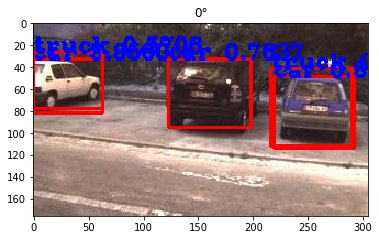

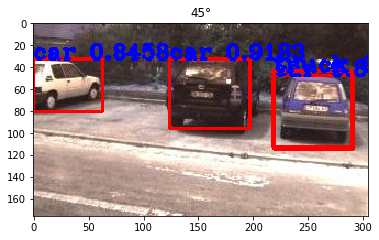

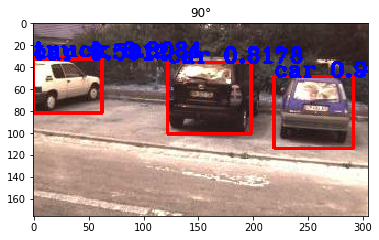

In [32]:
nb=np.random.randint(151)

plt.imshow(list_images[nb][0])
plt.title('0°')
plt.show()
plt.imshow(list_images[nb][1])
plt.title('45°')
plt.show()
plt.imshow(list_images[nb][2])
plt.title('90°')
plt.show()